Rain in Australia10

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sbn
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dropout,BatchNormalization,Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("E:/github/Rain in Australia/weatherAUS.csv")

In [3]:
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
data.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [6]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [7]:
# shows the numbers of unique values
for col in data.columns:
    n_uniq = data[col].nunique()
    print(f"Column Name:{col}, Unique Count: {n_uniq}")

Column Name:Date, Unique Count: 3436
Column Name:Location, Unique Count: 49
Column Name:MinTemp, Unique Count: 389
Column Name:MaxTemp, Unique Count: 505
Column Name:Rainfall, Unique Count: 681
Column Name:Evaporation, Unique Count: 358
Column Name:Sunshine, Unique Count: 145
Column Name:WindGustDir, Unique Count: 16
Column Name:WindGustSpeed, Unique Count: 67
Column Name:WindDir9am, Unique Count: 16
Column Name:WindDir3pm, Unique Count: 16
Column Name:WindSpeed9am, Unique Count: 43
Column Name:WindSpeed3pm, Unique Count: 44
Column Name:Humidity9am, Unique Count: 101
Column Name:Humidity3pm, Unique Count: 101
Column Name:Pressure9am, Unique Count: 546
Column Name:Pressure3pm, Unique Count: 549
Column Name:Cloud9am, Unique Count: 10
Column Name:Cloud3pm, Unique Count: 10
Column Name:Temp9am, Unique Count: 441
Column Name:Temp3pm, Unique Count: 502
Column Name:RainToday, Unique Count: 2
Column Name:RainTomorrow, Unique Count: 2


In [8]:
# Show the values of  RainToday column
data["RainToday"].value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

<AxesSubplot:>

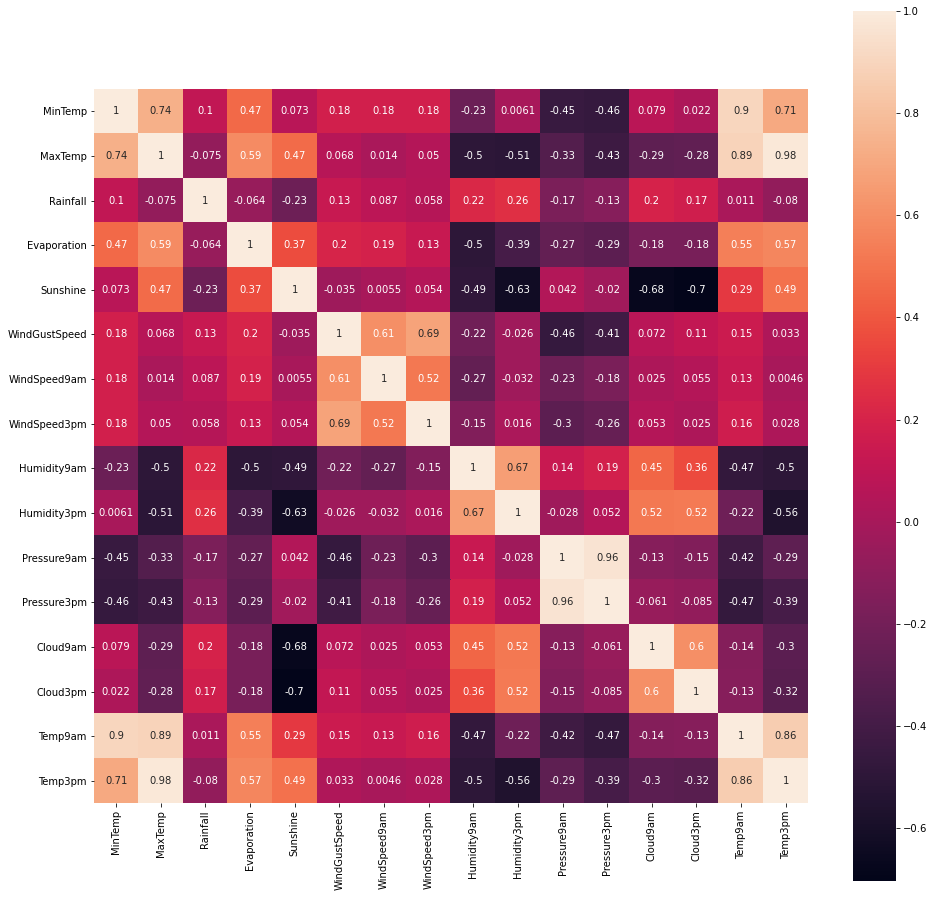

In [9]:
# Correlation amongst numeric attributes
corrmat = data.corr()
plt.subplots(figsize=(16,16))
sbn.heatmap(corrmat,annot=True, square=True)

we will look RainToday column values count on graph. 

<AxesSubplot:xlabel='RainToday', ylabel='count'>

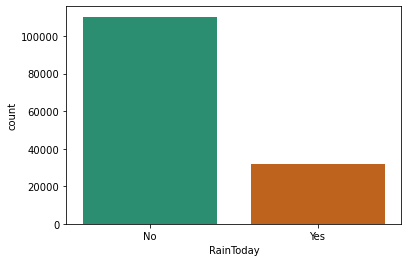

In [10]:
sbn.countplot(data = data,x = "RainToday",palette="Dark2")

we will look relation MinTemp and Location column. MinTemp column is minimum temperature. So our purpose has find to minimum temperature cities and we can show on the graph.

In [11]:
data[["Location","MinTemp"]].groupby("Location").mean().sort_values(by="MinTemp").iloc[:20]

MinTemp
Location                   
MountGinini        3.577280
Canberra           6.821866
Tuggeranong        7.242133
Ballarat           7.367950
Launceston         7.836190
Sale               8.567420
Bendigo            8.593713
Dartmoor           8.620034
MountGambier       8.825477
Nhil               8.999809
Hobart             9.078578
SalmonGums         9.313007
Nuriootpa          9.363242
Albury             9.530604
Portland           9.586867
WaggaWagga         9.617182
MelbourneAirport   9.973945
Watsonia          10.131879
Mildura           10.731572
Witchcliffe       10.775067

The next step is show us the above scenario on the graph.

In [12]:
fig = px.bar(data[["Location","MinTemp"]].groupby("Location").mean().sort_values(by="MinTemp").iloc[:20],x="MinTemp",
            labels={"MinTemp":"Minimum Temperature °C","Location":"Location Names"})
fig.update_layout(
    title={
        "text":"Top 20 Location has minimum temperature",
        "x":0.5,
        "y":0.95,
        "xanchor":"center",
        "yanchor":"top"
})
fig.show()
#Top 20 location has minimum temperature

we will look relation MaxTemp and Location column. MaxTemp column is maximum temperature. So our purpose has find to maximum temperature cities and we can show on the graph.

In [13]:
data[["Location","MaxTemp"]].groupby("Location").mean().sort_values(ascending=False,by="MaxTemp").iloc[:20]

MaxTemp
Location                
Katherine      34.935436
Darwin         32.540977
Uluru          30.383195
Cairns         29.558849
Townsville     29.367160
AliceSprings   29.248420
Moree          26.950548
Woomera        26.596707
Brisbane       26.448380
PearceRAAF     26.051238
Cobar          25.870093
GoldCoast      25.767062
PerthAirport   25.533234
Perth          25.034837
Mildura        24.840944
Penrith        24.764366
Richmond       24.458664
SalmonGums     24.250827
Newcastle      24.101070
BadgerysCreek  24.031208

In [14]:
fig = px.bar(data[["Location","MaxTemp"]].groupby("Location").mean().sort_values(ascending=False,by="MaxTemp").iloc[:20],x = "MaxTemp",
            labels = {"MaxTemp":"Maximum Temperature °C","Location":"Location Names"})
fig.update_layout(
title={
    "x":0.5,
    "y":0.95,
    "xanchor":"center",
    "yanchor":"top",
    "text": "Top 20 Location has maximium temperature"
})
fig.show()
# Top 20 location temp high


    Next step, we will look Max Temp relation by Location on the year.Thus we will learn which year has most high temperature value and most low temperature value.
    We just will show 12 location other wise they pick a lot of take up space. For this we take 12 max temperature location.


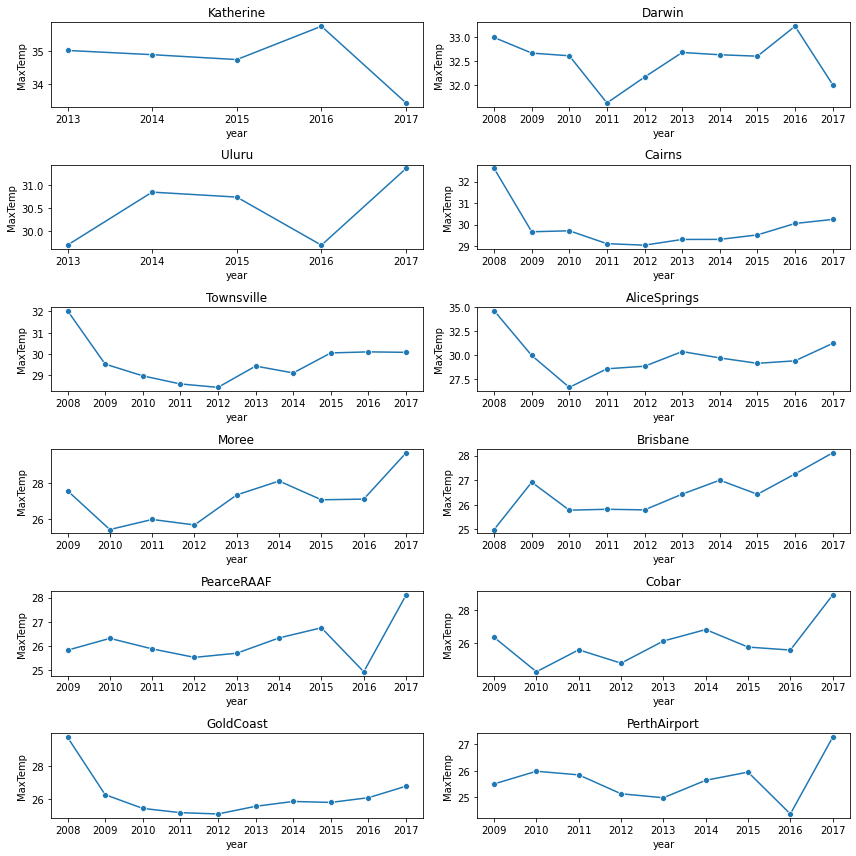

In [15]:
# Show of 12 cities with the max temp column by years
data["year"] = data["Date"].apply(lambda x: x.split("-")[0])
data["months"] = data["Date"].apply(lambda x: x.split("-")[1])
data["day"] = data["Date"].apply(lambda x: x.split("-")[2])

data_location = ["Katherine","Darwin","Uluru","Cairns","Townsville","AliceSprings","Moree","Brisbane","PearceRAAF","Cobar","GoldCoast","PerthAirport"]

grp = data.groupby("Location")

num_rows, num_cols = 6,2
f, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 12))
#f.suptitle('Distribution of Features', fontsize=16)

for index, city in enumerate(data_location):
    i,j = (index // num_cols, index % num_cols)
    city_group = grp.get_group(city)
    df=city_group[["MaxTemp","year"]].groupby("year").mean()
    sbn.lineplot(x="year",y="MaxTemp", data=df, ax=axes[i,j],marker="o").set_title(city)

plt.tight_layout()
plt.show()

we will look Min Temp relation by Location on the year.Thus we will learn which year has most low temperature value and most low temperature value.
We just will show 12 location other wise they pick a lot of take up space. For this we take 12 min temperature location.

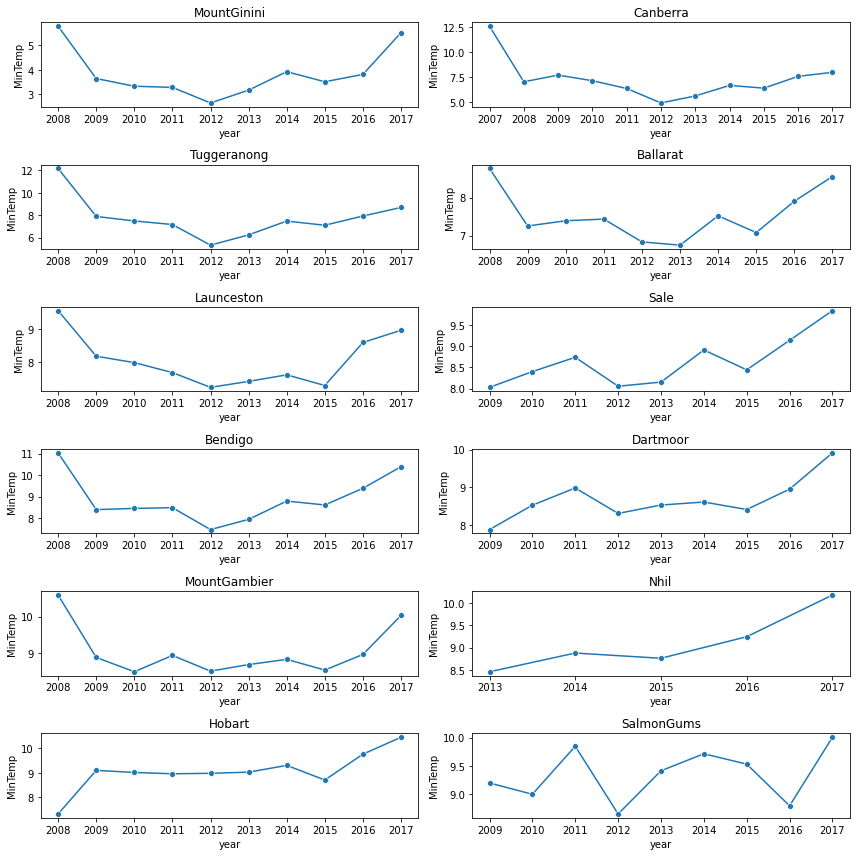

In [16]:
data["year"] = data["Date"].apply(lambda x: x.split("-")[0])
data["months"] = data["Date"].apply(lambda x: x.split("-")[1])
data["day"] = data["Date"].apply(lambda x: x.split("-")[2])

data_location = ["MountGinini","Canberra","Tuggeranong","Ballarat","Launceston","Sale","Bendigo","Dartmoor","MountGambier","Nhil","Hobart","SalmonGums"]

grp = data.groupby("Location")

num_rows,num_cols = 6,2
f ,axes = plt.subplots(nrows = num_rows,ncols=num_cols,figsize=(12,12))
for index,city in enumerate(data_location):
    i,j = (index // num_cols , index % num_cols)
    city_group = grp.get_group(city)
    df = city_group[["MinTemp","year"]].groupby("year").mean()
    sbn.lineplot(data = df,x = "year",y="MinTemp",ax = axes[i,j],marker="o").set_title(city)

plt.tight_layout()
plt.show()

 we will look which Location most rainfall take.

In [17]:
# mean rainfall all data 
data["Rainfall"].mean()

2.360918149917032

In [18]:
# Top 10 most rainfall on location 
data[["Location","Rainfall"]].groupby("Location").mean().sort_values(by="Rainfall",ascending=False).iloc[:10]

Rainfall
Location              
Cairns        5.742035
Darwin        5.092452
CoffsHarbour  5.061497
GoldCoast     3.769396
Wollongong    3.594903
Williamtown   3.591108
Townsville    3.485592
NorahHead     3.387299
Sydney        3.324543
MountGinini   3.292260

In [19]:
fig = px.bar(data[["Location","Rainfall"]].groupby("Location").mean().sort_values(by="Rainfall",ascending=False).iloc[:10],x="Rainfall",labels={"Location":"Location Names","Rainfall":"Rainfall Amount in day(mm)"})
fig.update_layout(
title={
    "x":0.5,
    "y":0.95,
    "xanchor":"center",
    "yanchor":"top",
    "text": "Top 10 Location with maximium rainfall"
})
fig.show()

we will look at the amount of rainfall in Location by years. In here we just selected twelve cities but these Locations are the ones with the highest rainfall.

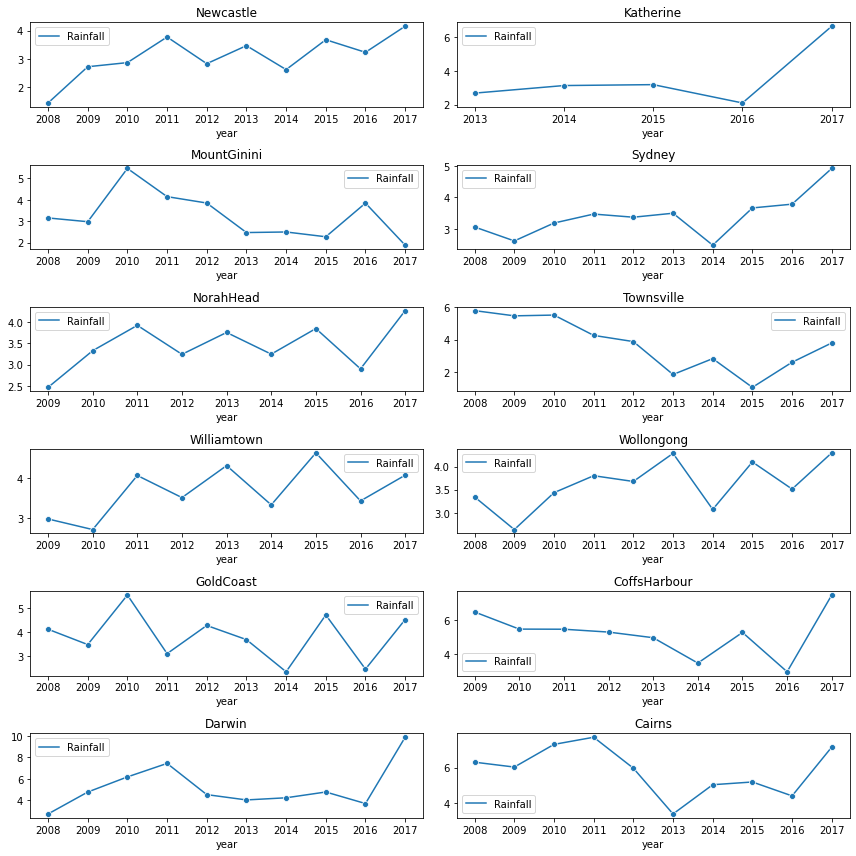

In [20]:
data["year"] = data["Date"].apply(lambda x: x.split("-")[0])
data["months"] = data["Date"].apply(lambda x: x.split("-")[1])
data["day"] = data["Date"].apply(lambda x: x.split("-")[2])

grp = data.groupby("Location")
data_location = ["Newcastle","Katherine","MountGinini","Sydney","NorahHead","Townsville","Williamtown","Wollongong","GoldCoast","CoffsHarbour","Darwin","Cairns"]

num_cols,num_rows = 2,6
f,axes = plt.subplots(nrows=num_rows,ncols=num_cols,figsize=(12,12))

for index,city in enumerate(data_location):
    i,j = (index//num_cols,index % num_cols)
    city_group = grp.get_group(city)
    df = city_group[["Rainfall","year"]].groupby("year").mean()
    sbn.lineplot(data=df,ax = axes[i,j],marker="o").set_title(city)
plt.tight_layout()
plt.show()

the amount of sunlight received in a day by Location (hours)

In [21]:
fig = px.bar(data.groupby("Location").mean().sort_values(ascending = False,by ="Sunshine").iloc[:10],x="Sunshine",labels={"Sunshine":"Sunshine (hours)","Location":"Location Names"})
fig.update_layout(
title={
    "x":0.5,
    "y":0.95,
    "xanchor":"center",
    "yanchor":"top",
    "text": "Top 10 Location with maximium Sunlight in a day"
})
fig.show()

the amount of sunlight received in a per months by Location (hours) 

In [22]:
data[["Location","Sunshine"]].groupby("Location").mean().sort_values(ascending = False,by ="Sunshine").iloc[:12]

Sunshine
Location              
AliceSprings  9.581944
Woomera       9.047932
Moree         8.898589
PerthAirport  8.795306
PearceRAAF    8.795306
Perth         8.784536
Cobar         8.674364
Darwin        8.499310
Mildura       8.468533
Townsville    8.457814
WaggaWagga    8.197864
Brisbane      8.081170

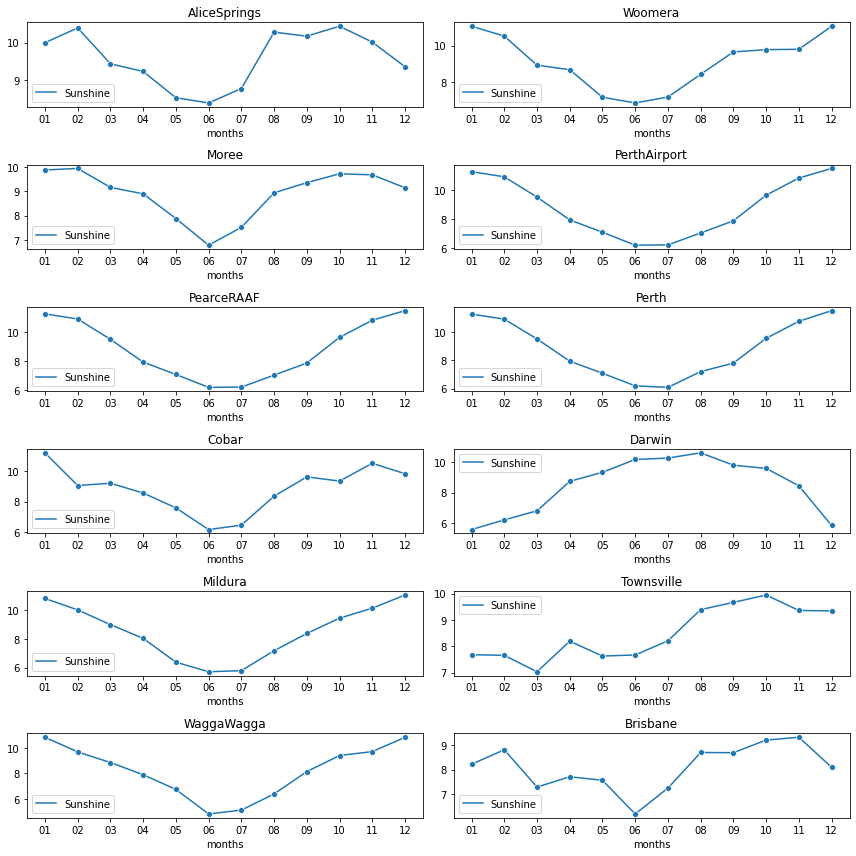

In [23]:
data["year"] = data["Date"].apply(lambda x: x.split("-")[0])
data["months"] = data["Date"].apply(lambda x: x.split("-")[1])
data["day"] = data["Date"].apply(lambda x: x.split("-")[2])
grp = data.groupby("Location")
data_location = ["AliceSprings","Woomera","Moree","PerthAirport","PearceRAAF","Perth","Cobar","Darwin","Mildura","Townsville","WaggaWagga","Brisbane"]

num_cols ,num_rows = 2,6

f,axes = plt.subplots(nrows = num_rows,ncols =num_cols,figsize=(12,12))

for index,city in enumerate(data_location):
    i,j = (index//num_cols,index % num_cols)
    city_group = grp.get_group(city)
    df = city_group[["Sunshine","months"]].groupby("months").mean()
    sbn.lineplot(data=df,ax = axes[i,j],marker="o").set_title(city)
plt.tight_layout()
plt.show()

will be show us the most windy Location.

In [24]:
data[["Location","WindGustSpeed"]].groupby("Location").mean().sort_values(ascending=False,by="WindGustSpeed").iloc[:10]

WindGustSpeed
Location                       
Hobart                47.530915
SydneyAirport         47.234280
MelbourneAirport      46.919172
MountGinini           46.253951
Wollongong            45.690842
Melbourne             45.610255
Ballarat              44.982719
PerthAirport          44.201822
Woomera               44.156566
PearceRAAF            43.579958

In [25]:
fig = px.bar(data[["Location","WindGustSpeed"]].groupby("Location").mean().sort_values(ascending=False,by="WindGustSpeed").iloc[:10],x="WindGustSpeed",
                labels={"Location":"Location Names","WindGustSpeed":"Wind Speed (km/h)"})
fig.update_layout(
title={
    "x":0.5,
    "y":0.95,
    "xanchor":"center",
    "yanchor":"top",
    "text": "Top 10 Location with maximum Windy"
})
fig.show()

 we will show top 12 most windy Location by months mean

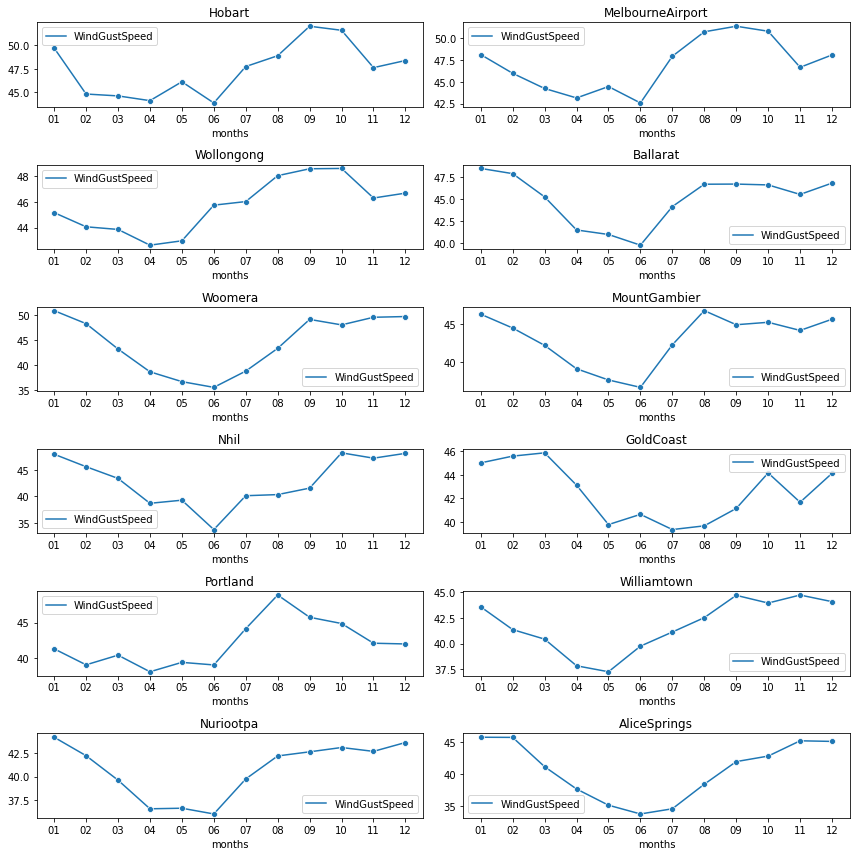

In [26]:
data["year"] = data["Date"].apply(lambda x: x.split("-")[0])
data["months"] = data["Date"].apply(lambda x: x.split("-")[1])
data["day"] = data["Date"].apply(lambda x: x.split("-")[2])

grp = data.groupby("Location")
data_location = ["Hobart","MelbourneAirport","Wollongong","Ballarat","Woomera","MountGambier","Nhil","GoldCoast","Portland","Williamtown","Nuriootpa","AliceSprings"]

num_cols, num_rows = 2,6
f,axes = plt.subplots(nrows= num_rows,ncols = num_cols,figsize=(12,12))

for index,city in enumerate(data_location):
    i,j = (index // num_cols,index % num_cols)
    city_group =grp.get_group(city)
    df=city_group[["WindGustSpeed","months"]].groupby("months").mean()
    sbn.lineplot(data=df,ax = axes[i,j],marker="o").set_title(city)
plt.tight_layout()
plt.show()

In [27]:
data["RainTomorrow"].isnull().sum()

3267

Data Cleaning to some NaN values

In [28]:
data = data.drop(["year","day","months"],axis=1)
data.drop(["Date"],axis=1,inplace =True)
data = data.dropna(how ="all")
data = data.dropna(subset = ["RainToday","RainTomorrow"],how="any")
data = data.dropna(subset= ["WindDir9am","WindGustDir","WindDir3pm"],how="any")

Fill NaN values

In [29]:
def fill_mean(column):
    for col in column:
        data[col] = data[col].fillna(data[col].mean())
columns_fill = data.columns.drop(["RainToday","RainTomorrow","WindDir9am","WindDir3pm","WindGustDir","Location"])
fill_mean(columns_fill)

Encode the categorical columns

In [30]:
def preprocessing(column):
    lbl = LabelEncoder()
    for col in column:
        lbl.fit(data[col])
        data[col] = lbl.transform(data[col].values.reshape(-1,))
columns_process = ["WindDir3pm","RainToday","WindDir9am","WindGustDir","Location"]
preprocessing(columns_process)

Decide train and test data columns

In [31]:
feature_col = data.columns.drop("RainTomorrow")
train = data[feature_col]
target = data["RainTomorrow"].map({"Yes":1,"No":0}) #In here encode(0,1) target because i will use regression. 

In [32]:
x_tr,x_test,y_tr,y_test = train_test_split(train,target,test_size=0.2,random_state=1)
x_train,x_val,y_train,y_val = train_test_split(x_tr,y_tr,test_size=0.1,random_state=1)

In [33]:
print("X train shape",x_train.shape)
print("Y train shape",y_train.shape)
print("X Val shape",x_val.shape)
print("Y Val shape",y_val.shape)

X train shape (89071, 21)
Y train shape (89071,)
X Val shape (9897, 21)
Y Val shape (9897,)


In [34]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)
X_val = sc.transform(x_val)

In this section, we will create our deep learning model. Firstly we need to know input_dim this is our feature columns(feature_col) count. After we will decide to how much Dense we need time we try for this mostly. In here isn't have special number, like you can start with this number. Mostly people start with input_dim number. They divide input_dim number to 2 and this keep going to 1. For regression last step just can 1 Dense.

In [35]:
model = Sequential()

model.add(Dense(25,activation="relu",kernel_initializer="normal",input_dim=21))
model.add(Dense(15,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                550       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                390       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 128       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 1,317
Trainable params: 1,317
Non-trainable params: 0
_________________________________________________________________


Compile and train the model.

In [36]:
model.compile(optimizer="adam",loss = "binary_crossentropy",metrics = ["accuracy"])
call_backs = EarlyStopping(monitor = "val_loss",patience = 10, mode = min,restore_best_weights=True )
hist = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=32,verbose = 1, epochs = 10,callbacks = [call_backs])

Epoch 1/10
2784/2784 [==============================] - 31s 3ms/step - loss: 0.3757 - accuracy: 0.8384 - val_loss: 0.3395 - val_accuracy: 0.8527
Epoch 2/10
2784/2784 [==============================] - 7s 3ms/step - loss: 0.3358 - accuracy: 0.8556 - val_loss: 0.3364 - val_accuracy: 0.8521
Epoch 3/10
2784/2784 [==============================] - 7s 2ms/step - loss: 0.3365 - accuracy: 0.8545 - val_loss: 0.3335 - val_accuracy: 0.8544
Epoch 4/10
2784/2784 [==============================] - 7s 2ms/step - loss: 0.3311 - accuracy: 0.8570 - val_loss: 0.3332 - val_accuracy: 0.8537
Epoch 5/10
2784/2784 [==============================] - 7s 3ms/step - loss: 0.3336 - accuracy: 0.8557 - val_loss: 0.3313 - val_accuracy: 0.8552
Epoch 6/10
2784/2784 [==============================] - 7s 3ms/step - loss: 0.3284 - accuracy: 0.8583 - val_loss: 0.3310 - val_accuracy: 0.8540
Epoch 7/10
2784/2784 [==============================] - 7s 3ms/step - loss: 0.3294 - accuracy: 0.8581 - val_loss: 0.3327 - val_accuracy

validation loss and training accuracy, validation accuracy values for model.

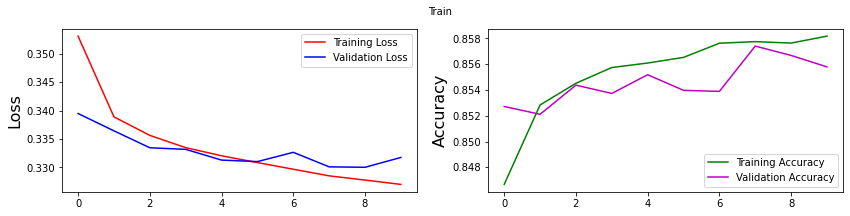

In [37]:
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Train', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], color ='r', label='Training Loss')
plt.plot(hist.history['val_loss'], color ='b', label='Validation Loss')
plt.legend(loc='upper right')


plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['accuracy'], color ='g', label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], color ='m', label='Validation Accuracy')
plt.legend(loc='lower right')

plt.show()

predict test and compare with test. For this use X_test data.

In [38]:
#Confusion Matrix
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_pred,y_test)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[18457  2674]
 [  894  2717]]


In [39]:
# Accuracy Score
acc = accuracy_score(y_test,y_pred)
print("Accuracy Score: ",acc)

Accuracy Score:  0.85579177107752


In [40]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       False       0.95      0.87      0.91     21131
        True       0.50      0.75      0.60      3611

    accuracy                           0.86     24742
   macro avg       0.73      0.81      0.76     24742
weighted avg       0.89      0.86      0.87     24742



Show on the graph to confusion matrix

<AxesSubplot:>

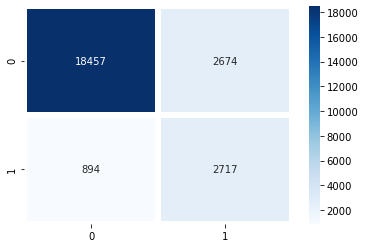

In [41]:
sbn.heatmap(cm, annot=True,fmt='.5g',linewidths=5,cmap="Blues",xticklabels='01',
    yticklabels='01')

predict validation and compare with y_val. For this use X_val data.

In [42]:
# Confusion Matrix
y_pred_val = model.predict(X_val)
y_pred_val = (y_pred_val > 0.5)
cm_val = confusion_matrix(y_pred_val,y_val)
print(cm_val)

[[7340 1050]
 [ 322 1185]]


In [43]:
# Accuracy Score
acc_val = accuracy_score(y_pred_val,y_val)
print("Accuracy Validation: ",acc_val)

Accuracy Validation:  0.8613721329695867


In [44]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_pred_val, y_val))

              precision    recall  f1-score   support

       False       0.96      0.87      0.91      8390
        True       0.53      0.79      0.63      1507

    accuracy                           0.86      9897
   macro avg       0.74      0.83      0.77      9897
weighted avg       0.89      0.86      0.87      9897



<AxesSubplot:>

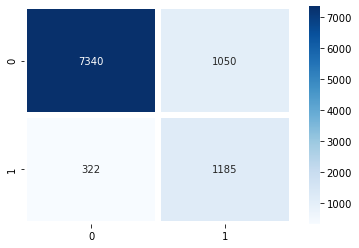

In [45]:
sbn.heatmap(cm_val, annot=True,fmt='.5g',linewidths=5,cmap="Blues",xticklabels='01',
    yticklabels='01')